In [ ]:
import os
import pandas as pd
from IPython.display import display


# Thư mục chứa các file .dat
folder = "/content/drive/MyDrive/Colab Notebooks/MachineLearning/Stock Cluster/Stock_for_clustering(S&P500)"

all_series = {}
min_len = float("inf")

# 1. Đọc từng file
for file in os.listdir(folder):
    if file.endswith(".dat"):
        filepath = os.path.join(folder, file)
        ticker = os.path.splitext(file)[0]  # tên file làm cột

        # Đọc file, mỗi dòng là 1 giá trị
        series = pd.read_csv(filepath, header=None, names=[ticker])

        # Fill NaN bằng mean trong cột
        series[ticker] = series[ticker].fillna(series[ticker].mean())

        # Cập nhật độ dài min
        min_len = min(min_len, len(series))

        all_series[ticker] = series

# 2. Cắt tất cả series về cùng độ dài nhỏ nhất
for ticker in all_series:
    all_series[ticker] = all_series[ticker].iloc[:min_len].reset_index(drop=True)

# 3. Ghép thành DataFrame
df = pd.concat(all_series.values(), axis=1)
df.columns = all_series.keys()

print("Kích thước DataFrame:", df.shape)
with pd.option_context('display.max_rows', 100, 'display.max_columns', None):
    display(df)


Kích thước DataFrame: (245, 500)


,CERN,SAI,URBN,CIEN,PCLN,XTO,DYN,APOL,WYE,FSLR,DF,BK,OMC,MWV,NTRS,ACE,HP,DPS,MDT,WFMI,AFL,ROST,CVG,KG,KR,MAS,GWW,STI,JNPR,MRK,PNW,BDK,CMCSA,FE,ITT,TJX,SJM,TE,NSM,XL,COP,MJN,BNI,HIG,IP,EL,PCP,AON,XRAY,SRE,VRSN,COL,SVU,LLL,MEE,DISCA,DOW,CVS,NI,CMA,MET,VIA,LUK,SE,WYNN,HD,TMO,UNH,ECL,HAS,SWY,BSX,BBY,FTR,AKAM,D,AXP,APD,WEC,VMC,MOT,BAC,ICE,MBI,NWSA,MYL,CAT,XRX,IRM,JNJ,IFF,GPS,CVX,UPS,EQR,INTC,LTD,FMC,DHI,MWW,HUM,LOW,SHLD,EP,MCD,DUK,NOVL,JPM,CLF,MIL,ISRG,PEP,LEG,TWX,HSP,AMZN,CFN,MSFT,AMD,ATI,STZ,CTSH,XEL,HRS,CBG,PCAR,MTW,INTU,GPC,SLE,FISV,R,EMR,CNP,VNO,DTV,BHI,VAR,BTU,AZO,ADM,HAL,PTV,JEC,V,COG,FAST,TSN,TIF,HBAN,CHRW,VTR,MDP,LLY,ESRX,AVP,SLB,KIM,C,BJS,STT,BIG,TRV,MCK,BDX,CB,PLD,ROK,VLO,MI,JWN,MAT,WLP,EBAY,KMX,HPQ,FHN,GAS,LIFE,SYK,CA,T,EMN,CEPH,DTE,SCHW,LSI,CTL,POM,LO,LH,BF.B,NU,CVH,STJ,TROW,FII,TEG,FIS,JBL,AYE,PM,SBUX,AMGN,RAI,PWR,PFG,TWC,MRO,NVDA,DVN,NSC,SNA,CAM,MMM,FLR,GT,A,PBCT,PCL,RTN,AMT,TLAB,X,DNB,IPG,PSA,BA,SII,HOG,BCR,RRC,WPI,VZ,RRD,FTI,MUR,OI,NBR,NUE,PRU,NDAQ,MFE,BMY,EIX,GD,ED,AAPL,HRB,BRCM,M,JCP,BBT,WHR,K,LNC,PGR,FLS,RHT,ETN,MU,SYMC,EFX,CTXS,TDC,CSX,MCHP,CL,JCI,DE,IGT,JNS,BEN,HST,QCOM,KLAC,ACS,UNM,CF,WPO,NOV,CCE,BLL,WU,BXP,SO,MHS,HSY,GENZ,CAH,MMC,NOC,ROP,GIS,PDCO,DIS,CBS,PEG,LMT,NWL,NKE,JAVA,BAX,VFC,MA,MOLX,Q,AVY,UNP,NEM,KBH,ADP,PCG,TSO,ADBE,BMC,CHK,LEN,SWN,HNZ,TSS,MAR,LXK,CCL,CEG,DOV,BBBY,GNW,GE,PHM,CAG,CSCO,IBM,WFC,BMS,GR,CPB,GCI,SEE,STR,KEY,CME,WM,NYT,AIV,NTAP,XOM,BIIB,APA,PCS,CRM,F,ABT,GOOG,YHOO,AMP,SYY,GLW,IVZ,PG,HAR,KMB,APC,PPG,NBL,ANF,HRL,THC,AET,FPL,AIZ,ETR,RSG,L,AVB,EXPD,ITW,SIAL,HOT,AEE,PXD,DVA,ALTR,RHI,RX,MO,PX,SNI,CTAS,SWK,FCX,ADI,AA,WFR,MKC,HES,CPWR,CI,DD,ETFC,DV,PH,CNX,HCN,OXY,FITB,AKS,EQT,SPG,COH,DRI,DFS,PFE,LLTC,WAT,EOG,PPL,PBG,ERTS,XLNX,SNDK,WYN,SHW,EK,EMC,PAYX,FRX,FLIR,AN,WDC,MS,HON,SPLS,MON,KFT,FDX,PLL,AEP,JDSU,PGN,EXC,WY,USB,LUV,ARG,PKI,CLX,KO,FDO,SCG,UTX,SRCL,DNR,GME,CMI,AES,LM,RF,TXN,COF,COST,PNC,NVLS,TXT,QLGC,CMS,APH,DO,CELG,GILD,EXPE,ORCL,WMT,CSC,DGX,MTB,TAP,ADSK,S,AGN,SLM,HCBK,TMK,NRG,ZION,FO,DELL,ABC,DHR,MCO,WIN,GS,ALL,AMAT,HCP,MHP,TGT,KSS,CINF,AIG
0,8963,16592,22704,60332,10679,657341,139923,32525,88153,8498,33102,147657,30001,21940,24025,40933,25858,25807,48242,15512,55301,15488,10519,44991,442271,70526,4592,62068,60278,95824,11813,19867,241706,22598,15660,40861,6953,14615,44490,35561,124322,8296,99623,64205,64414,7999,10572,22478,8891,13943,23082,6359,43914,12434,38627,26834,93069,148414,25645,32328,67120,722,23792,52865,19769,74375,36774,136094,19414,18966,36296,74481,96050,32875,65913,35594,93726,9809,7008,14515,168380,1136877,4833,59164,100257,67454,114229,87407,8820,114702,4122,63336,165755,87916,38947,1027744,105034,6764,85082,28561,39601,99981,15953,106839,98088,83371,24114,387218,74009,2613,3240,92891,16362,44444,6482,151657,20116,443635,217896,17880,15017,25712,17598,6017,60540,21430,43610,57042,14176,112635,12851,17527,44433,25881,13858,124667,71704,10537,40107,3335,118613,151462,13667,39927,39029,37733,14141,59791,28086,152470,13505,19036,4951,53208,29789,49962,129938,71821,3322853,22939,76426,12558,34265,34918,11221,42494,71415,10219,75300,110674,40763,16455,72011,223957,35292,123810,28944,1611,12952,13297,35922,341596,12339,13284,12535,32298,53456,59855,18712,21392,15574,2464,8395,23049,21067,23314,8415,8358,37881,46002,22778,79654,102739,56555,9905,27567,31451,20599,42505,116972,11627,54606,4923,31624,43401,28756,53477,34758,34542,10042,16589,31485,117617,147035,2817,46457,20129,49336,39274,25293,13411,25941,7164,144463,12260,14351,21573,45548,119176,58973,41733,30219,22237,127362,12136,8276,20947,196742,19310,80259,81529,65658,57067,15018,26214,33960,38942,10339,19665,9067,250044,163332,12203,24866,29095,53107,21042,27079,56157,46176,136417,26738,13265,110941,342027,67656,8212,52122,15060,247,70904,99686,10060,194611,17835,46022,32485,14161,40587,19813,34013,17596,6197,18790,7882,178898,127283,40122,25313,25317,26445,77485,134623,7354,9820,15402,324212,15996,84232,94031,46371,30784,29524,53644,42113,33297,161441,97508,51332,20117,26390,30600,19589,24704,27626,11515,34962,184068,7412

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# ---- settings ----
TRADING_DAYS = 245  # shape of data
K_RANGE = range(2, 11)

In [ ]:
# ---- helper functions ----
def max_drawdown_from_prices(prices: pd.Series):
    # prices: Series of raw prices (not returns)
    returns = prices.pct_change().fillna(0)
    cum = (1 + returns).cumprod()
    running_max = cum.cummax()
    drawdown = (cum - running_max) / running_max
    return drawdown.min()  # negative number

def compute_features_from_df(df_prices: pd.DataFrame):
    # df_prices: index=time, columns=tickers
    # 1) returns
    returns = df_prices.pct_change().dropna(how='all')  # drop first NaN row
    # market proxy: equal-weighted portfolio returns
    market_ret = returns.mean(axis=1)

    features = []
    tickers = df_prices.columns.tolist()
    for t in tickers:
        s = df_prices[t].dropna()
        r = returns[t].dropna()
        if len(r) < 5:
            # skip tiny series but keep NaN features to handle later
            features.append((t, np.nan,)*16)  # will fix columns below
            continue

        mean_ret = r.mean()
        vol = r.std()
        skew = r.skew()
        kurt = r.kurtosis()
        cum_return = (s.iloc[-1] / s.iloc[0]) - 1
        mdd = max_drawdown_from_prices(s)
        # annualized
        ann_return = mean_ret * TRADING_DAYS
        ann_vol = vol * np.sqrt(TRADING_DAYS)
        sharpe = (mean_ret / vol) * np.sqrt(TRADING_DAYS) if vol > 0 else np.nan
        # Sortino-like: downside deviation
        downside = r[r < 0]
        downside_std = downside.std()
        sortino = (mean_ret / downside_std) * np.sqrt(TRADING_DAYS) if downside_std and downside_std > 0 else np.nan
        # Beta & corr vs market
        cov = r.cov(market_ret)
        var_market = market_ret.var()
        beta = cov / var_market if var_market and var_market > 0 else np.nan
        corr_mkt = r.corr(market_ret)
        # Momentum (21 trading days)
        if len(s) > 21:
            momentum_21 = (s.iloc[-1] / s.iloc[-22]) - 1
        else:
            momentum_21 = np.nan
        # Autocorrelation lag-1
        try:
            ac1 = r.autocorr(lag=1)
        except Exception:
            ac1 = np.nan
        # rolling vol mean (30-day)
        try:
            vol_30_mean = r.rolling(30).std().mean()
        except Exception:
            vol_30_mean = np.nan
        # amplitude (proxy for range since no OHLC)
        amplitude = (s.max() - s.min()) / (s.mean() if s.mean() != 0 else np.nan)

        features.append((
            t, mean_ret, ann_return, vol, ann_vol, skew, kurt,
            cum_return, mdd, sharpe, sortino, beta, corr_mkt,
            momentum_21, ac1, vol_30_mean, amplitude
        ))

    cols = [
        "ticker", "mean_ret_daily", "ann_return", "std_daily", "ann_vol",
        "skew", "kurtosis", "cum_return", "max_drawdown",
        "sharpe_annual", "sortino_annual", "beta", "corr_market",
        "momentum_21", "autocorr1", "vol30_mean", "amplitude"
    ]
    feat_df = pd.DataFrame(features, columns=cols).set_index("ticker")
    return feat_df, returns, market_ret

In [ ]:
# ---- compute features ----
features, returns, market_ret = compute_features_from_df(df)

# handle NaNs: you can choose median imputation (robust) or mean
features_imputed = features.copy()
for c in features_imputed.columns:
    if features_imputed[c].isna().any():
        features_imputed[c] = features_imputed[c].fillna(features_imputed[c].median())

In [ ]:
# winsorize: keep value at 1%–99%
features_winsor = features.clip(
    lower=features.quantile(0.01),
    upper=features.quantile(0.99),
    axis=1
)

# log transform for big scale
for col in ["ann_return", "ann_vol", "kurtosis"]:
    features_winsor[col] = np.log1p(features_winsor[col].abs()) * np.sign(features_winsor[col])


# *Standard Scaler*

In [ ]:
# ---- scaling ----
scaler = StandardScaler()  # or RobustScaler()
X = scaler.fit_transform(features_winsor)

In [ ]:
# ---- metric scans: Elbow, Silhouette, CH, DB ----
inertia = []
sil = []
ch = []
db = []
for k in K_RANGE:
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
    labels = km.labels_
    inertia.append(km.inertia_)
    # silhouette requires 2..(n_samples-1)
    try:
        sil.append(silhouette_score(X, labels))
    except Exception:
        sil.append(np.nan)
    try:
        ch.append(calinski_harabasz_score(X, labels))
    except Exception:
        ch.append(np.nan)
    try:
        db.append(davies_bouldin_score(X, labels))
    except Exception:
        db.append(np.nan)

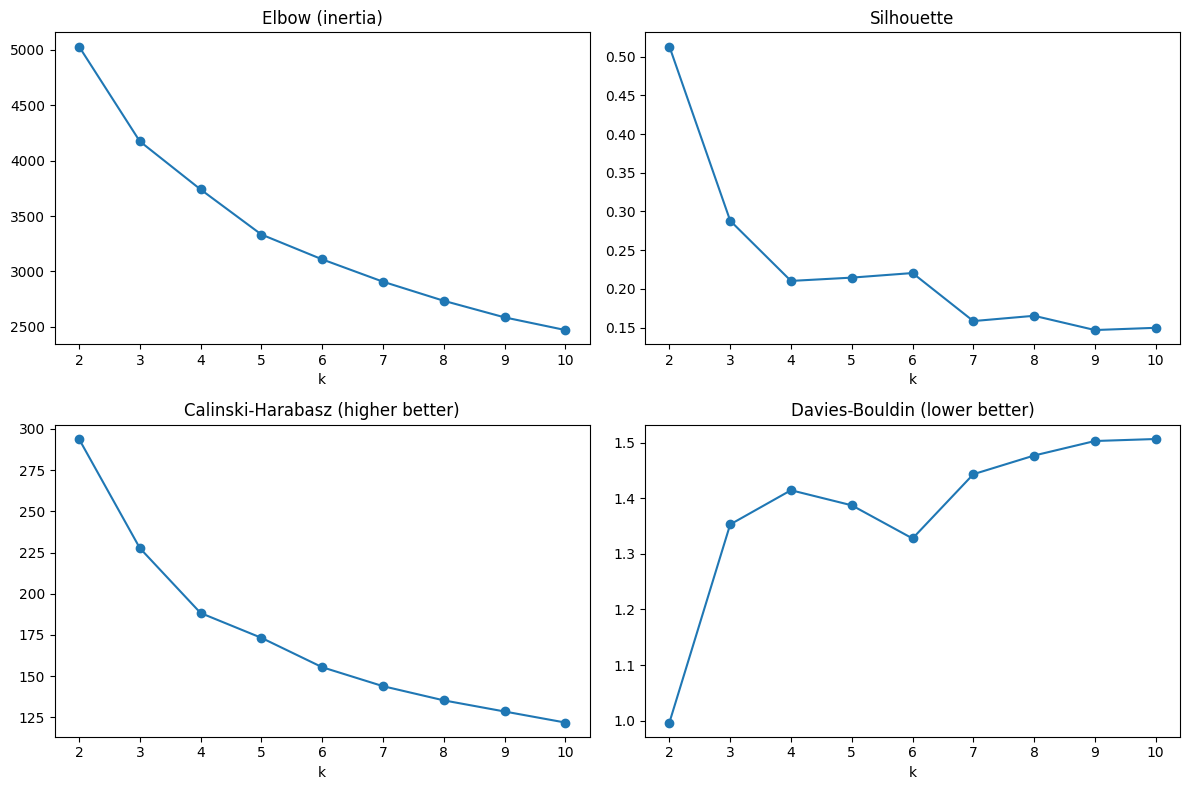

In [ ]:
# ---- plot metrics ----
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(list(K_RANGE), inertia, '-o'); plt.title("Elbow (inertia)"); plt.xlabel("k")
plt.subplot(2,2,2)
plt.plot(list(K_RANGE), sil, '-o'); plt.title("Silhouette"); plt.xlabel("k")
plt.subplot(2,2,3)
plt.plot(list(K_RANGE), ch, '-o'); plt.title("Calinski-Harabasz (higher better)"); plt.xlabel("k")
plt.subplot(2,2,4)
plt.plot(list(K_RANGE), db, '-o'); plt.title("Davies-Bouldin (lower better)"); plt.xlabel("k")
plt.tight_layout(); plt.show()

In [ ]:
# ---- choose k: pick the k with max silhouette (or use elbow) ----
best_k = 3 # int(K_RANGE[np.nanargmax(sil)]) if any(~np.isnan(sil)) else 4
print("Chọn k =", best_k)

Chọn k = 3


In [ ]:
# ---- final clustering ----
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=50).fit(X)
features_imputed["cluster"] = kmeans.labels_

In [ ]:
# cluster sizes & members
print(features_imputed.groupby("cluster").size())
for c in sorted(features_imputed["cluster"].unique()):
    print(f"\nCluster {c} sample tickers:", features_imputed[features_imputed["cluster"]==c].sample(min(10, features_imputed[features_imputed["cluster"]==c].shape[0])).index.tolist())


cluster
0    127
1     32
2    341
dtype: int64

Cluster 0 sample tickers: ['SEE', 'GR', 'BRCM', 'BMS', 'MCO', 'BCR', 'GS', 'SII', 'UTX', 'S']

Cluster 1 sample tickers: ['MIL', 'ARG', 'AGN', 'AON', 'RX', 'CSC', 'GD', 'OI', 'BIIB', 'BF.B']

Cluster 2 sample tickers: ['CHK', 'CFN', 'TSN', 'SCHW', 'DNR', 'CNP', 'ALL', 'AKS', 'FCX', 'COG']


In [ ]:
# ---- cluster profiling (centroids in original feature space) ----
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=features_imputed.columns[:-1])
#centroids_df = pd.DataFrame(centroids, columns=features_imputed.columns)

print("\nCentroids (feature means per cluster):")
print(pd.DataFrame(centroids_df).T)


Centroids (feature means per cluster):
                        0          1         2
mean_ret_daily   0.129086   0.249183  0.083089
ann_return       3.465062   4.097440  3.042863
std_daily        0.833031   2.538979  0.487903
ann_vol          2.618080   3.640334  2.148253
skew             7.217994  13.907618  2.364463
kurtosis         4.174197   5.328075  2.240046
cum_return       3.520549  18.370539  0.337408
max_drawdown    -0.950865  -0.956385 -0.940945
sharpe_annual    2.465951   1.632988  2.647751
sortino_annual  12.270704  24.685663  8.245901
beta            -0.000375   0.000129 -0.000175
corr_market     -0.006586   0.004980 -0.005333
momentum_21      0.315117   0.225278  0.199117
autocorr1       -0.149598  -0.039593 -0.251691
vol30_mean       0.677747   1.309044  0.471080
amplitude        8.099097  11.636697  4.631025


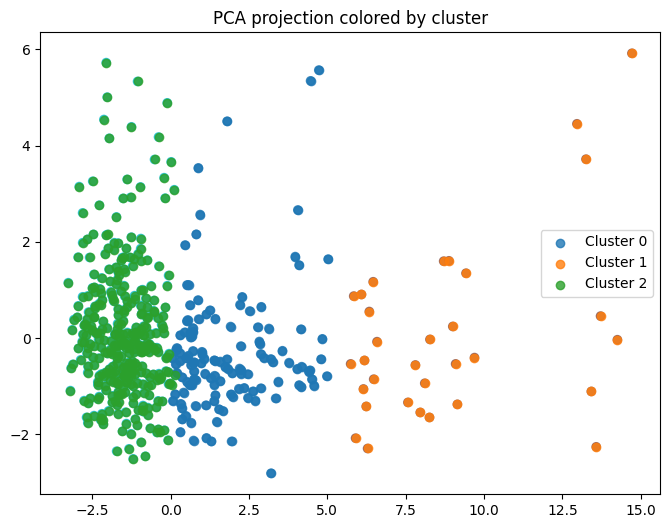

In [ ]:
# ---- 2D visualization via PCA ----
pca = PCA(n_components=2)
proj = pca.fit_transform(X)
plt.figure(figsize=(8,6))
plt.scatter(proj[:,0], proj[:,1], c=kmeans.labels_, cmap="tab10", alpha=0.8)
for c in np.unique(kmeans.labels_):
    plt.scatter(
        proj[kmeans.labels_ == c, 0],
        proj[kmeans.labels_ == c, 1],
        label=f"Cluster {c}",
        alpha=0.8
    )
plt.legend()
plt.title("PCA projection colored by cluster")
plt.show()

In [ ]:
clusters = features_imputed['cluster'].unique()

# gom ticker theo cluster
cluster_dict = {}
for c in clusters:
    tickers_in_c = features_imputed[features_imputed['cluster'] == c].index.tolist()
    cluster_dict[f"cluster_{c}"] = tickers_in_c

# chuyển thành DataFrame
clusters_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in cluster_dict.items()]))

# lưu ra csv
clusters_df.to_csv("stock_cluster_features_and_labels_with_standard_scaler.csv", index=False)
print("Saved: stock_cluster_features_and_labels_with_standard_scaler.csv")
with pd.option_context('display.max_rows', 100, 'display.max_columns', None):
    display(clusters_df)

Saved: stock_cluster_features_and_labels_with_standard_scaler.csv


,cluster_0,cluster_2,cluster_1
0,CERN,URBN,APOL
1,SAI,CIEN,GWW
2,DYN,PCLN,STI
3,DF,XTO,AON
4,OMC,WYE,XRAY
...,...,...,...
336,NaN,ALL,NaN
337,NaN,AMAT,NaN
338,NaN,MHP,NaN
339,NaN,KSS,NaN


# *RobustScaler*

In [ ]:
# ---- scaling ----
scaler = RobustScaler()  # or StandardScaler()
X = scaler.fit_transform(features_winsor)

In [ ]:
# ---- metric scans: Elbow, Silhouette, CH, DB ----
inertia = []
sil = []
ch = []
db = []
for k in K_RANGE:
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
    labels = km.labels_
    inertia.append(km.inertia_)
    # silhouette requires 2..(n_samples-1)
    try:
        sil.append(silhouette_score(X, labels))
    except Exception:
        sil.append(np.nan)
    try:
        ch.append(calinski_harabasz_score(X, labels))
    except Exception:
        ch.append(np.nan)
    try:
        db.append(davies_bouldin_score(X, labels))
    except Exception:
        db.append(np.nan)

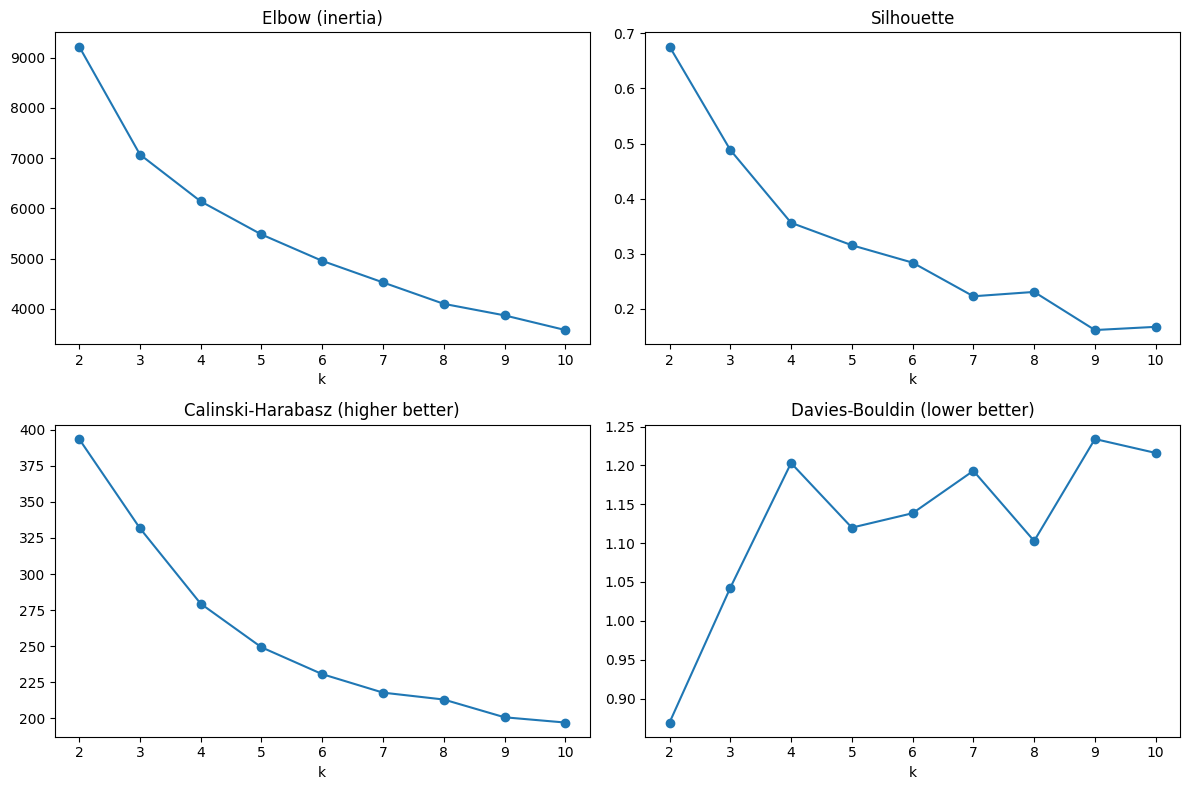

In [ ]:
# ---- plot metrics ----
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(list(K_RANGE), inertia, '-o'); plt.title("Elbow (inertia)"); plt.xlabel("k")
plt.subplot(2,2,2)
plt.plot(list(K_RANGE), sil, '-o'); plt.title("Silhouette"); plt.xlabel("k")
plt.subplot(2,2,3)
plt.plot(list(K_RANGE), ch, '-o'); plt.title("Calinski-Harabasz (higher better)"); plt.xlabel("k")
plt.subplot(2,2,4)
plt.plot(list(K_RANGE), db, '-o'); plt.title("Davies-Bouldin (lower better)"); plt.xlabel("k")
plt.tight_layout(); plt.show()

In [ ]:
# ---- choose k: pick the k with max silhouette (or use elbow) ----
best_k = 3 # int(K_RANGE[np.nanargmax(sil)]) if any(~np.isnan(sil)) else 3
print("Chọn k =", best_k)

Chọn k = 3


In [ ]:
# ---- final clustering ----
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=50).fit(X)
features_imputed["cluster"] = kmeans.labels_

In [ ]:
# cluster sizes & members
print(features_imputed.groupby("cluster").size())
for c in sorted(features_imputed["cluster"].unique()):
    print(f"\nCluster {c} sample tickers:", features_imputed[features_imputed["cluster"]==c].sample(min(10, features_imputed[features_imputed["cluster"]==c].shape[0])).index.tolist())

cluster
0    412
1     16
2     72
dtype: int64

Cluster 0 sample tickers: ['FLR', 'EFX', 'GIS', 'F', 'PH', 'UTX', 'XLNX', 'CMI', 'COH', 'PM']

Cluster 1 sample tickers: ['BA', 'MFE', 'AGN', 'BF.B', 'VIA', 'XRAY', 'WEC', 'CSC', 'GD', 'PTV']

Cluster 2 sample tickers: ['APH', 'LUK', 'STJ', 'EXPE', 'DELL', 'HAS', 'NOVL', 'RTN', 'LO', 'EK']


In [ ]:
# ---- cluster profiling (centroids in original feature space) ----
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=features_imputed.columns[:-1])
#centroids_df = pd.DataFrame(centroids, columns=features_imputed.columns)

print("\nCentroids (feature means per cluster):")
print(pd.DataFrame(centroids_df).T)


Centroids (feature means per cluster):
                       0          1          2
mean_ret_daily  0.088794   0.281090   0.161396
ann_return      3.099063   4.217399   3.673681
std_daily       0.524183   3.085343   1.223449
ann_vol         2.204523   3.812190   2.948372
skew            2.918997  14.114624  10.271531
kurtosis        2.511782   5.338250   4.780707
cum_return      0.426177  33.974087   5.984069
max_drawdown   -0.943316  -0.948233  -0.950121
sharpe_annual   2.638368   1.577777   2.167536
sortino_annual  8.716935  29.435152  15.247685
beta           -0.000217   0.001962  -0.000626
corr_market    -0.005859   0.027103  -0.007155
momentum_21     0.187753   0.493376   0.414993
autocorr1      -0.239397  -0.028821  -0.097221
vol30_mean      0.494841   1.458497   0.852650
amplitude       5.163028  10.408099   9.533918


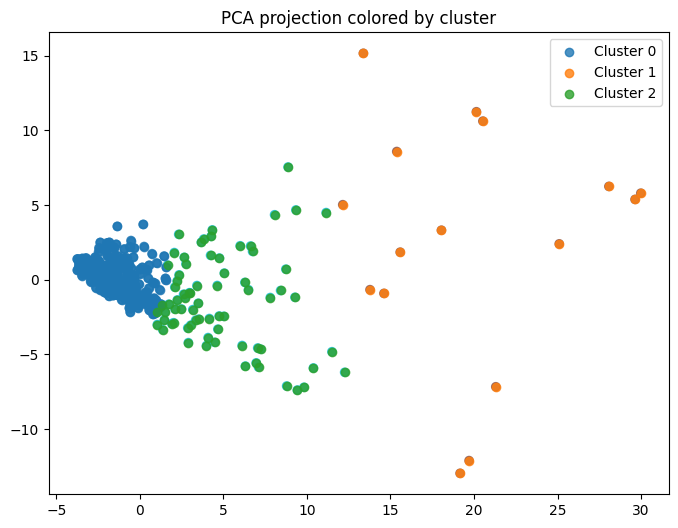

In [ ]:
# ---- 2D visualization via PCA ----
pca = PCA(n_components=2)
proj = pca.fit_transform(X)
plt.figure(figsize=(8,6))
plt.scatter(proj[:,0], proj[:,1], c=kmeans.labels_, cmap="tab10", alpha=0.8)
for c in np.unique(kmeans.labels_):
    plt.scatter(
        proj[kmeans.labels_ == c, 0],
        proj[kmeans.labels_ == c, 1],
        label=f"Cluster {c}",
        alpha=0.8
    )
plt.legend()
plt.title("PCA projection colored by cluster")
plt.show()


In [ ]:
clusters = features_imputed['cluster'].unique()

# gom ticker theo cluster
cluster_dict = {}
for c in clusters:
    tickers_in_c = features_imputed[features_imputed['cluster'] == c].index.tolist()
    cluster_dict[f"cluster_{c}"] = tickers_in_c

# chuyển thành DataFrame
clusters_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in cluster_dict.items()]))

# lưu ra csv
clusters_df.to_csv("stock_cluster_features_and_labels_with_standard_scaler.csv", index=False)
print("Saved: stock_cluster_features_and_labels_with_standard_scaler.csv")
with pd.option_context('display.max_rows', 100, 'display.max_columns', None):
    display(clusters_df)

Saved: stock_cluster_features_and_labels_with_standard_scaler.csv


,cluster_2,cluster_0,cluster_1
0,CERN,URBN,GWW
1,SAI,CIEN,XRAY
2,APOL,PCLN,VIA
3,DF,XTO,WEC
4,OMC,DYN,PTV
...,...,...,...
407,NaN,HCP,NaN
408,NaN,MHP,NaN
409,NaN,TGT,NaN
410,NaN,KSS,NaN
